# Проект "Принятие решений в бизнесе"

Итак, мы приступаем к новому проекту. Согласно легенде, вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Первая часть

В первой части проекта мы будем заниматься приоритизацией гипотез.

Согласно легенде исследования, у нас есть файл с девятью гипотезами по увеличению выручки интернет-магазина  с указанными параметрами Reach, Impact, Confidence, Effort. 

Для начала импортируем все необходимые нам для исследования библиотеки, чтобы больше к этому не возвращаться:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_colwidth', 150)

И посмотрим на нашу таблицу:

In [2]:
df = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
display(df.head(10))
print()
df.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Согласно легенде исследования, таблица состоит из следующих столбцов:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Все сходится с заявленной информацией, 9 гипотез, названия колонок тоже совпадают. Для удобства приведем названия к нижнему регистру:

In [4]:
df.columns = df.columns.str.lower()

Проверками на дубликаты и пропуски можно пренебречь, так как тут все достаточно очевидно.

Стоит также отметить, что выбрана десятибалльная шкала оценки параметров.

Приступим к приоритизации гипотез. Добавим столбец `ICE` и проведем соответствующие вычисления:

In [5]:
df['ICE'] = round((df['impact']*df['confidence'])/df['efforts'])
display(df[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


Самыми перспективными выглядят гипотезы под номерами 8, 0, 7. Дальше с небольшим отрывом идут гипотезы 6 и 2. Гипотезы 1, 5, 3, 4 набирают меньше всего баллов. 

Теперь посмотрим, изменится ли картина, если добавить сюда значения охвата пользователей по методике `RICE`:

In [6]:
df['RICE'] = round((df['reach']*df['impact']*df['confidence'])/df['efforts'])
display(df[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Картина значительно поменялась. Из предыдущей тройки лидеров остались только две гипотезы: номер 7 на первом месте и номер 0 на третьем. Причем гипотеза 7 опережает второе место практически вдвое, имея максимальный охват в 10 баллов.  Зато в тройке появилась гипотеза номер 2 за счет охвата, оцененного в 8 баллов. А гипотеза номер 8, которая была на первом месте, сместилась на четвертую позицию - и ее охват составляет всего 1 балл. Гипотеза номер 6 осталась на четвертой позиции, похоже, охват влияет на нее не так сильно. 

### Выводы по первой части

При приоритизации гипотез лучше всегда учитывать потенциальный охват, это может сильно повлиять на итоговую расстановку мест. Стоит отметить, что в предложенном выше списке гипотез первая половина списка (1-5 места) и вторая (6-9 места) остались неизменными, поменялась лишь расстановка гипотез в порядке приоритетности.

# ВТОРАЯ ЧАСТЬ

## Анализ А/В теста

Приступаем ко второй части исследования, а именно, к анализу А/В теста.

Загрузим таблицы с данными о заказах и посетителях:

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Ознакомимся с первой таблицей заказов:

In [8]:
display(orders.head(10))
print()
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


И приведем столбец `date` к формату `datetime`

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим, есть ли пропуски в данных:

In [11]:
print('Количество пропусков в таблице:')
print(orders.isna().sum())

Количество пропусков в таблице:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Пропусков не наблюдается.

Заодно проведем проверку на дубликаты:

In [12]:
print(f'Количество дубликатов в таблице: {orders.duplicated().sum()}')

Количество дубликатов в таблице: 0


Переходим к таблице с посетителями:

In [13]:
display(visitors.head(10))
print()
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Аналогично приведем столбец `date` к формату `datetime`:

In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

И посчитаем пропуски:

In [15]:
print('Количество пропусков в таблице:')
print(visitors.isna().sum())

Количество пропусков в таблице:
date        0
group       0
visitors    0
dtype: int64


Также проверим на наличие дубликатов:

In [16]:
print(f'Количество дубликатов в таблице: {visitors.duplicated().sum()}')

Количество дубликатов в таблице: 0


### Выводы

Предобработка данных проведена успешно, дубликатов и пропусков не обнаружено. Теперь мы готовы приступать к дальнейшему анализу.


## График кумулятивной выручки по группам


Для начала соберем уникальные значения дат и групп теста по парам:

In [19]:
datesGroups = orders[['date','group']].drop_duplicates() 

Соберем кумулятивные данные о заказах по дням: 

In [20]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])



Похожим способом мы получаем кумулятивные данные о пользователях по дням:

In [21]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Собранные данные мы объединяем в общую таблицу и переименовываем столбцы во избежание путаницы:

In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим графики кумулятивной выручки по группам:

Для начала объявим переменные, в которых мы сохраним кумулятивное количество заказов и выручки по датам:

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]  # для группы А

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]  # для группы В


И теперь построим графики выручки по группам:

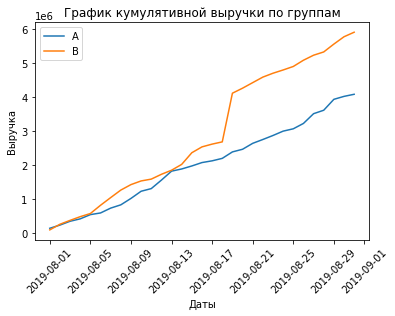

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')  # для группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')  # для группы В
plt.plot(figsize=(15,7), grid = True)
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Даты')
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.show()

На графике видно, что в определенный момент группа В резко вырывается вперед. Либо в этот период было очень иного заказов, либо это выброс, который надо будет удалить. 



## График кумулятивного среднего чека


Теперь построим график кумулятивного среднего чека по группам:

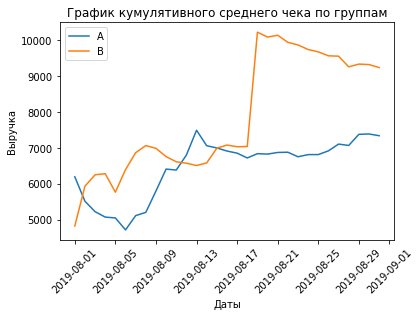

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend(loc = 'upper left')
plt.ylabel('Выручка')
plt.xlabel('Даты')
plt.xticks(rotation=45)
plt.show()

Мы видим, что значения среднего чека колеблются весьма сильно в обеих группах, причем группа В опять показывает резкие скачки, которые требуют дальнейшего анализа. Группа А показывает признаки стабилизации ближе к концу теста. Скорее всего, нам потребуется дополнительный анализ выбросов по этой метрике.


## График относительного изменения кумулятивного среднего чека группы B к группе A


Также построим график относительного изменения кумулятивного среднего чека группы B к группе A. Для этого соберем данные в одном датафрейме и добавим линию ноля:

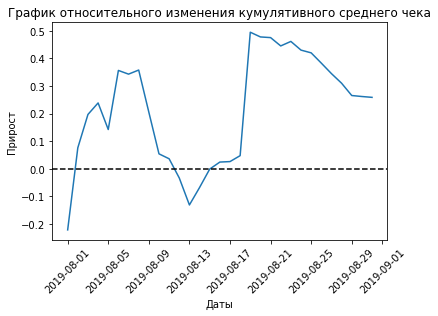

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека')
plt.ylabel('Прирост')
plt.xlabel('Даты')
plt.xticks(rotation=45)
plt.show()

Значительные колебания на графике указывают нам на наличие выбросов или крупных заказов.



## График кумулятивной конверсии по группам

Теперь посмотрим на конверсию. Для начала добавим в общую таблицу столбец `conversion`, поделив `orders` на `visitors`:

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

И сгруппируем по группам А/В:

In [28]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']  # группа А

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']  # группа В

Построим график кумулятивной конверсии по группам:

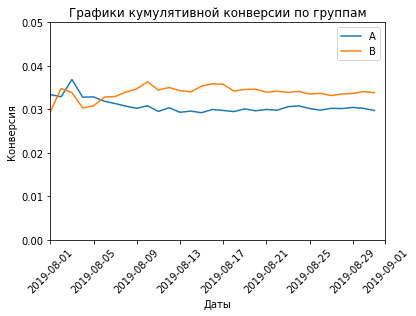

In [29]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]) 
plt.title('Графики кумулятивной конверсии по группам')
plt.legend()
plt.ylabel('Конверсия')
plt.xlabel('Даты')
plt.xticks(rotation=45)
plt.show()

На графике мы видим, что вначале в течение определенного времени конверсия группы А была выше, но затем группа В вырвалась вперед и ситуация стабилизировалась, теперь конверсия группы В стабильно выше.


##  График относительного изменения кумулятивной конверсии по группам


Посмотрим на относительное различие кумулятивной конверсии по группам:

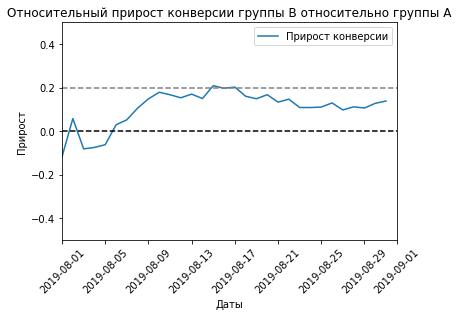

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Прирост конверсии")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5]) 
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.ylabel('Прирост')
plt.xlabel('Даты')
plt.xticks(rotation=45)
plt.show()

Мы видим, что вначале конверсия группы В немного просела, но затем обошла группу А и ее прирост относительно группы А на данный момент составляет около 10%. В целом, можно сказать, что группа В стабильно конвертируется лучше и, вероятно, еще немного вырастет.

## Точечный график количества заказов по пользователям

Далее мы присутпаем к анализу заказов. 

Найдем количество заказов по пользователям и переименуем столбцы для удобства анализа:

In [31]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))


       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Два пользователя отметились 11 заказами в магазине, явно постоянные клиенты. 

Посмотрим на эту информацию на графике:

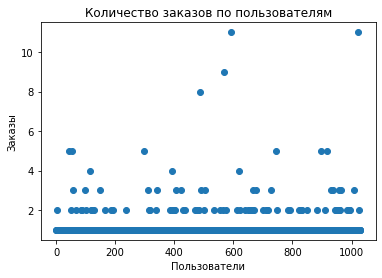

In [32]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.ylabel('Заказы')
plt.xlabel('Пользователи')
plt.show()

Диаграмма явно показывает нам, что количество пользователей, сделавших более двух заказов, невелико. Чтобы понять, какое количество заказов можно считать выбросами, нам необходимо посчитать 90, 95 и 99 процентили:

## Расчет 90, 95 и 99 перцентилей количества заказов

In [33]:
print('90, 95 и 99 перцентили:{}.'.format(np.percentile(ordersByUsers['orders'], [90, 95, 99])))

90, 95 и 99 перцентили:[1. 2. 4.].


То есть, мы видим, что только 1% пользователей оформил более 4 заказов, и только 5% более 2 заказов. 

Таким образом, будет разумно выбрать нижней границей 2 заказа и избавиться от тех пользователей, которые заказывали больше.

## Точечный график стоимости заказов по пользователям

Теперь посмотрим на то, что у нас происходит со стоимостью заказов:

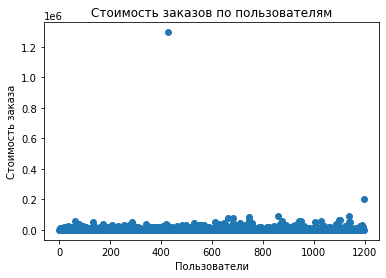

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'] )
plt.title('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()

В целом график выглядит вполне пристойно, но в глаза бросается очевидный выброс в 1,3 млн (ну или очень большая оптовая закупка) и заказ в 200 000 (тоже много, но не 1,3 млн).


## Расчет 90, 95 и 99 перцентилей количества заказов


Посмотрим на перцентили:

In [35]:
print('90, 95 и 99 перцентили:{}.'.format(np.percentile(orders['revenue'], [90, 95, 99])))

90, 95 и 99 перцентили:[18168.  28000.  58233.2].


Всего 1% пользователей сделал заказы на сумму более 58000 рублей, и всего 5% на сумму более 28000 рублей. 
Таким образом, выбираем нижнюю границу стоимости заказа в 58000 рублей. Для минимизации потерь уберем все заказы более 58000 рублей.

## Расчет статистической значимости различия в конверсии между группами по «сырым» данным

Теперь посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным.

Для начала сформулируем гипотезы:
* Н0 - различий в конверсии между группами нет. 
* Н1 различия в конверсии между группами есть.

Начнём с подготовки данных, объединив их в пригодную для анализа таблицу:

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]  # посетители по датам группы А
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]  # посетители по датам группы В
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})   # заказы по датам группы А
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})   # заказы по датам группы В
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# объединяем все в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))  # проверка таблицы

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              20   
1 2019-08-02              20            93822              23   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              16   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  20               101217               719   
1                  43               266748               619   
2                  59               38

Теперь посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным с применением теста Манна-Уитни и выведем значение p-value для сравнения конверсии между группами, а также относительное различие в конверсии между группами. 

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']  # заказы группы А

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']  # заказы группы В 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.01679
0.117


Полученное нами p-value значительно меньше 0.05, поэтому мы отвергаем нулевую гипотезу, различия в конверсии присутствуют.

Прирост конверсии группы В составляет 11,7%.



## Расчет статистической значимости различия в среднем чеке между группами по «сырым» данным


Теперь проверим статистическую значимость различий в среднем чеке между сегментами:
* Н0 - различий в среднем чеке между группами нет. 
* Н1 - различия в среднем чеке между группами есть.

In [38]:
# p-value 
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# прирост
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


Полученное нами p-value значительно больше 0.05, поэтому мы можем сказать, что различий в среднем чеке в группах А и В нет.

Но в то же время, средний чек группы В значительно больше, чем в группе А на 25,9%. 

## Расчет статистической значимости различия в конверсии между группами по «очищенным» данным

Теперь очистим данные от аномальных значений. Мы приняли за аномалии всех пользователей, сделавших больше 2 заказов и всех, заказавших на сумму более 58000 рублей:

In [39]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))  # проверка
print(abnormalUsers.shape) 


1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
(31,)


Итого у нас 31 аномальный пользователь.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.Подготовим выборки количества заказов по пользователям по группам теста и применим статистический критерий Манна-Уитни:

In [40]:

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01007
0.174


Различия в конверсии по-прежнему есть, но прирост конверсии группы В составляет уже 17,4%.

## Расчет статистической значимости различия в среднем чеке между группами по «очищенным» данным

Теперь посмотрим, что произошло с данными по среднему чеку:

In [41]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.798
-0.020


И снова мы можем сказать, что по очищенным данным различий в среднем чеке в группах А и В нет, но средний чек группы В стал ниже, чем в группе А на 2% (с 25%).

### Выводы

По итогам мы можем сделать следующие краткие выводы:

* Присутствует статистически значимое различие по конверсии между группами и по «сырым», и отфильтрованным данным;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий; 

# Выводы

Часть 1:
При проритизации гипотез большое значение имеет предполагаемый охват. Этот параметр может сильно повлиять на итоговую расстановку мест. 

Часть 2:

После проведения А/В теста, у нас есть следующая информация:

* Присутствует статистически значимое различие по конверсии между группами и по «сырым», и отфильтрованным данным;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A и на настоящий момент есть незначительная тенденция к улучшению:
* График различия среднего чека говорит о том, что результаты группы B понемногу ухудшаются, но все еще значительно лучше, чем у группы А.

Исходя из вышесказанного, мы можем признать тест успешным и зафиксировать победу группы В.